In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
#https://archive.ics.uci.edu/ml/datasets/Wholesale+customers#
#https://github.com/codebasics/py/blob/master/ML/13_kmeans/13_kmeans_tutorial.ipynb

In [0]:
#df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-wholesale-customers.csv')
df = pd.read_csv('https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-income-age-group.csv')

In [82]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [0]:
#df.groupby('Region').count()

,Channel,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,ClusterID
Region,,,,,,,,
1,77,77,77,77,77,77,77,77
2,47,47,47,47,47,47,47,47
3,316,316,316,316,316,316,316,316


In [92]:
dfp = df.drop('Name', axis=1)
dfp.head()

,Age,Income($)
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       22 non-null     object
 1   Age        22 non-null     int64 
 2   Income($)  22 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 656.0+ bytes


Text(0, 0.5, 'Income($)')

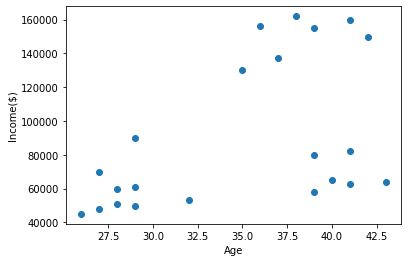

In [63]:
plt.scatter(dfp.Age,dfp['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [101]:
scaler = MinMaxScaler()
scaler.fit(dfp)
scaled = pd.DataFrame(scaler.transform(dfp),columns=dfp.columns)
scaled.head()

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436


In [0]:
#from sklearn.preprocessing import normalize
#data_scaled = normalize(df)
#data_scaled = pd.DataFrame(data_scaled, columns=df.columns)
#data_scaled.head()

In [102]:
scaled

,Age,Income($)
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


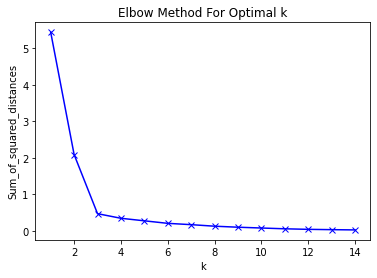

In [103]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(scaled)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [104]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(scaled)
labels = k_means.labels_
print(labels)

[0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 2 2 2 2 2 2]


In [86]:
k_means.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428]])

In [105]:
df["Cluster"] = labels
df.head(5)

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1


In [106]:
df.groupby('Cluster').mean()

,Age,Income($)
Cluster,,
0,28.333333,58611.111111
1,38.285714,150000.000000
2,40.500000,68666.666667


In [73]:
df.groupby('Cluster').count()

,Name,Age,Income($)
Cluster,,,
0,9,9,9
1,6,6,6
2,7,7,7


In [75]:
df

,Name,Age,Income($),Cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,2
5,Gautam,39,155000,2
6,David,41,160000,2
7,Andrea,38,162000,2
8,Brad,36,156000,2
9,Angelina,35,130000,2


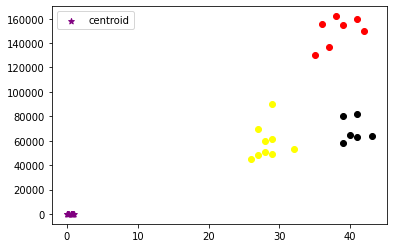

In [113]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='yellow')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

In [110]:
frame = pd.DataFrame(scaled)
frame['cluster'] = labels
frame['cluster'].value_counts()

0    9
1    7
2    6
Name: cluster, dtype: int64

In [74]:
df1 = scaled[scaled.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()

AttributeError: ignored

In [56]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2],
      dtype=int32)

In [57]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),ClusterID,cluster
0,Rob,27,70000,1,0
1,Michael,29,90000,1,0
2,Mohan,29,61000,1,2
3,Ismail,28,60000,1,2
4,Kory,42,150000,2,1


In [58]:
km.cluster_centers_

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

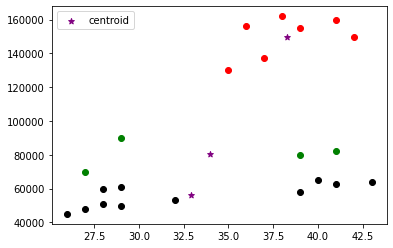

In [59]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.legend()